<img src=https://d2jx2rerrg6sh3.cloudfront.net/image-handler/ts/20231016061234/ri/1350/src/images/news/ImageForNews_761716_16974511531857403.jpg>

Import Statements

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### Step 1. Data loading - tumour classification

In [63]:
cancer = load_breast_cancer()
type(cancer)

sklearn.utils._bunch.Bunch

Let's look at the components of the dataset

In [64]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [65]:
print(type(cancer.data), type(cancer.target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [66]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [67]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

As we see here, data has been collected on 569 formations that can be malignant (breast cancer) or benign.

For each of the 10 basic characteristics of the tumor (such as radius, texture, perimeter, area, etc.), three values were calculated (arithmetic mean, standard deviation and the average of the three largest values). Thus, 30 parameters or features are obtained.
In addition, each lesion was classified as malignant or benign.

Creating Data Frame

In [68]:
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [69]:
cancer_df['target'] = cancer.target

In [70]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


The target variable is denoted as zero and one. Let's see which number indicates a benign tumor and which one indicates a malignant one.

In [71]:
unique, counts = np.unique(cancer.target, return_counts = True)
unique, counts

(array([0, 1]), array([212, 357]))

From the description we know that there are 212 malignant tumors and 357 benign tumors in the dataset. It turns out that zero means a malignant formation, and one means benign.

Let's look at the type of variables

In [72]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

All dependent variables are quantitative. The target variable is categorical, but, importantly, is indicated by a numerical value (0 and 1).

Descriptive Statistics

In [73]:
cancer_df.describe().round(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,0.06,...,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08,0.63
std,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,0.01,...,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02,0.48
min,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,...,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06,0.00
25%,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,0.06,...,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07,0.00
50%,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06,...,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08,1.00
75%,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,0.07,...,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09,1.00
max,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10,...,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21,1.00


### Stage 2. Pre-processing of data

Missing values

In [74]:
cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

For example, we see that the mean texture has a spread from 9.71 to 39.28. In this case, the mean area is in the range from 143.50 to 2501.00. Due to the characteristics of the algorithm, the model may give preference (more weight) to this particular feature.

To prevent this from happening, the data must be normalized or brought to a single scale (normalization, feature scaling).

In [75]:
cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)

In [76]:
scaler = StandardScaler()

In [77]:
scaled_data = scaler.fit_transform(cancer_df)

In [78]:
cancer_df_scaled = pd.DataFrame(scaled_data, columns=cancer.feature_names)

In [79]:
cancer_df_scaled['target'] = cancer.target

In [80]:
cancer_df_scaled.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0


In [81]:
cancer_df_scaled.describe().round(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,...,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.63
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.48
min,-2.03,-2.23,-1.98,-1.45,-3.11,-1.61,-1.11,-1.26,-2.74,-1.82,...,-2.22,-1.69,-1.22,-2.68,-1.44,-1.31,-1.75,-2.16,-1.60,0.00
25%,-0.69,-0.73,-0.69,-0.67,-0.71,-0.75,-0.74,-0.74,-0.70,-0.72,...,-0.75,-0.69,-0.64,-0.69,-0.68,-0.76,-0.76,-0.64,-0.69,0.00
50%,-0.22,-0.10,-0.24,-0.30,-0.03,-0.22,-0.34,-0.40,-0.07,-0.18,...,-0.04,-0.29,-0.34,-0.05,-0.27,-0.22,-0.22,-0.13,-0.22,1.00
75%,0.47,0.58,0.50,0.36,0.64,0.49,0.53,0.65,0.53,0.47,...,0.66,0.54,0.36,0.60,0.54,0.53,0.71,0.45,0.45,1.00
max,3.97,4.65,3.98,5.25,4.77,4.57,4.24,3.93,4.48,4.91,...,3.89,4.29,5.93,3.96,5.11,4.70,2.69,6.05,6.85,1.00


As we can see, the scale of the variables has changed. Now they all have the same arithmetic mean (zero) and the same standard deviation (one).

It is better to normalize data after we split our sample into training and testing parts.

### Stage 3. Exploratory Data Analysis

In this case we are talking about the relationship between quantitative and categorical variables. Here are the options we have for identifying such a relationship:

We can quantify how different basic statistics (such as the arithmetic mean) will be for each variable depending on the class.

We can plot two histograms on one graph, just like we did before.

In [82]:
data = cancer_df_scaled.groupby('target').mean().T

In [83]:
data.head(2)

target,0,1
mean radius,0.947340,-0.562566
mean texture,0.538776,-0.319945


As we see, now the lines contain our characteristics and the corresponding average values, divided into two groups (the average value for a malignant tumor and the average for a benign one). Now let's calculate the difference and calculate the modulus. This way we can compare the resulting values with each other.

In [84]:
data['diff'] = abs(data.iloc[:, 0] - data.iloc[:, 1])

In [85]:
data = data.sort_values(by = ['diff'], ascending = False)

In [86]:
data.head(10)

target,0,1,diff
worst concave points,1.029791,-0.611529,1.641320
worst perimeter,1.015969,-0.603320,1.619289
mean concave points,1.007793,-0.598465,1.606258
worst radius,1.007585,-0.598342,1.605927
mean perimeter,0.963700,-0.572281,1.535981
worst area,0.952267,-0.565492,1.517759
mean radius,0.947340,-0.562566,1.509906
mean area,0.920031,-0.546349,1.466380
mean concavity,0.903649,-0.536621,1.440270
worst concavity,0.855960,-0.508301,1.364261


We can also see this difference in the average values and in the distribution of the variable in general in the combined histograms. Let's build such histograms for the feature with the largest difference in average worst concave points.

Text(0.5, 1.0, 'Distribution of worst concave points for two types of tumors')

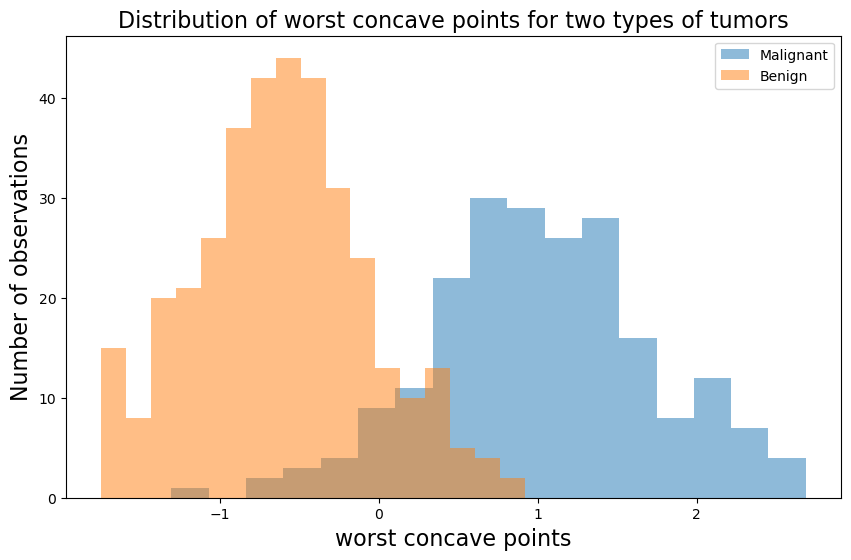

In [87]:
bins = 17

plt.figure(figsize= (10,6))

plt.hist(cancer_df_scaled.loc[cancer_df_scaled['target'] == 0, 'worst concave points'], bins, alpha = 0.5, label = 'Malignant')

plt.hist(cancer_df_scaled.loc[cancer_df_scaled['target'] == 1, 'worst concave points'], bins, alpha = 0.5, label = 'Benign')
plt.legend(loc = 'upper right')

plt.xlabel('worst concave points', fontsize = 16)
plt.ylabel('Number of observations', fontsize = 16)
plt.title('Distribution of worst concave points for two types of tumors', fontsize = 16)

As we can see, the distribution of the trait is different for malignant and benign formations.

### Stage 4. Selection and extraction of features

Based on the EDA conducted, let's take ten features with the largest differences in the arithmetic mean depending on the value of the target variable. Thus, our model will include: worst concave points, worst perimeter, mean concave points, worst radius, mean perimeter, worst area, mean radius, mean area, mean concavity, worst concavity.

Let's put our features in variable X and classes in variable y. To do this, let’s take the feature names from the index of our auxiliary dataframe data, convert them into a list and make a slice based on the first 10 values (and all this in order to avoid typing the column names manually).

We will write the result into the features variable.

In [88]:
features = list(data.index[:10])
print(features)

['worst concave points', 'worst perimeter', 'mean concave points', 'worst radius', 'mean perimeter', 'worst area', 'mean radius', 'mean area', 'mean concavity', 'worst concavity']


In [89]:
X = cancer_df_scaled[features]

In [90]:

y = cancer_df_scaled['target']

### Stage 5. Training and assessing the quality of the model

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

Model training and prediction

In [93]:
model = LogisticRegression()

In [94]:
model.fit(X_train, y_train)

LogisticRegression()

In [95]:
y_pred = model.predict(X_test)

Model quality assessment

Confusion Matrix

In [98]:
model_matrix = confusion_matrix(y_test, y_pred, labels = [1,0])

Let's change the order so that malignant tumors are a positive class

In [99]:
model_matrix_df = pd.DataFrame(model_matrix)
model_matrix_df

,0,1
0,104,4
1,2,61


In [102]:
model_matrix_df = pd.DataFrame(model_matrix, columns = ['Benign prognosis', 'Malignant prognosis'], index = ['Fact of Benign', 'Fact of malignant'])
model_matrix_df

,Benign prognosis,Malignant prognosis
Fact of Benign,104,4
Fact of malignant,2,61


As we can see, the model made six errors:

She classified two tumors as benign, although in fact they were not.
In addition, four benign tumors were labeled as malignant

The remaining values are predicted correctly

The percentage of correctly predicted values is called accuracy. To calculate it, we take those values that are predicted correctly (TP + TN) and divide by the total number of predictions.

In [104]:
model_accuracy = accuracy_score(y_test, y_pred)
round(model_accuracy, 2)

0.96

So, our model predicts the correct result 96% of the time. It seems to be very good. However, there is one problem. From a medical and common sense point of view, our greatest fear is that the model will not be able to recognize a malignant tumor, and we are primarily interested in minimizing the false negative result when we tell a patient with cancer not to worry. The accuracy indicator does not provide this information.